# Post-processing: Extraction of connected components

After this post processing step, each connected object will have a unique integer label starting from 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk

import cc3d

import notebook_utils

## Test on dummy data

### Create a dummy binary mask to simulate multiple GTVs and false positives

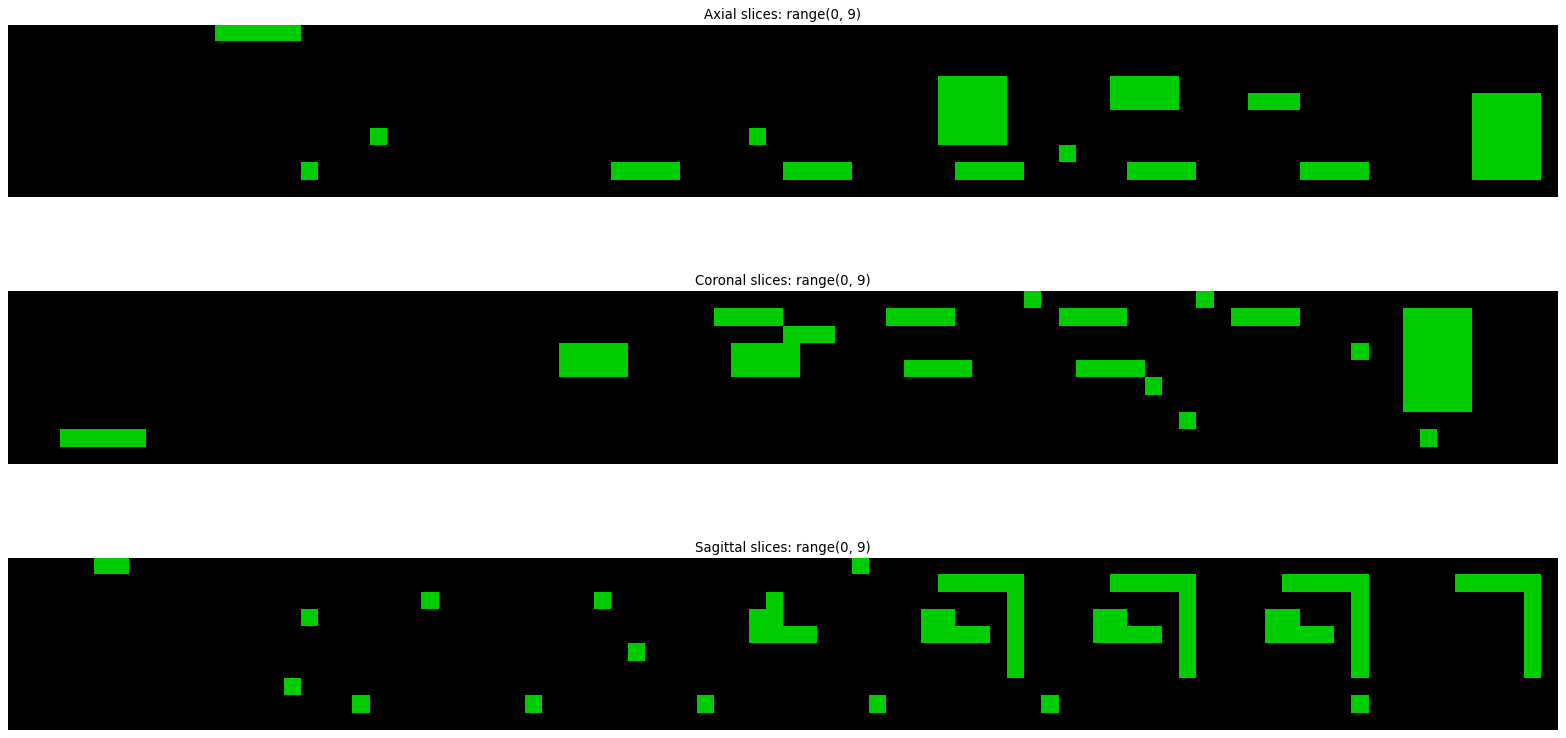

In [2]:
# Create a dummy binary mask
dummy_mask = np.zeros((10,10, 10))

# Object 1
dummy_mask[1:2, 0:1, 2:7] = 1

# Object 2
dummy_mask[5:7, 3:4, 4:8] = 1
dummy_mask[5:6, 3:7, 4:8] = 1
dummy_mask[6:7, 3:5, 4:8] = 1

# Object 3
dummy_mask[3:9, 8:9, 5:9] = 1
dummy_mask[8:9, 4:9, 5:9] = 1

# Add some random 1's as noise
dummy_mask[np.random.randint(low=0, high=10, size=10),
           np.random.randint(low=0, high=10, size=10),
           np.random.randint(low=0, high=10, size=10)] = 1

dummy_mask = dummy_mask.astype(np.int32)

dummy_mask_sitk = sitk.GetImageFromArray(dummy_mask.astype(np.int8))
dummy_mask_sitk_rgb = sitk.LabelToRGB(dummy_mask_sitk) # Get RGB color mapping
notebook_utils.display_slices(dummy_mask_sitk_rgb,
                             sagittal_slice_idxs=range(0,9),
                             coronal_slice_idxs=range(0,9),
                             axial_slice_idxs=range(0,9))

### Extract connected components

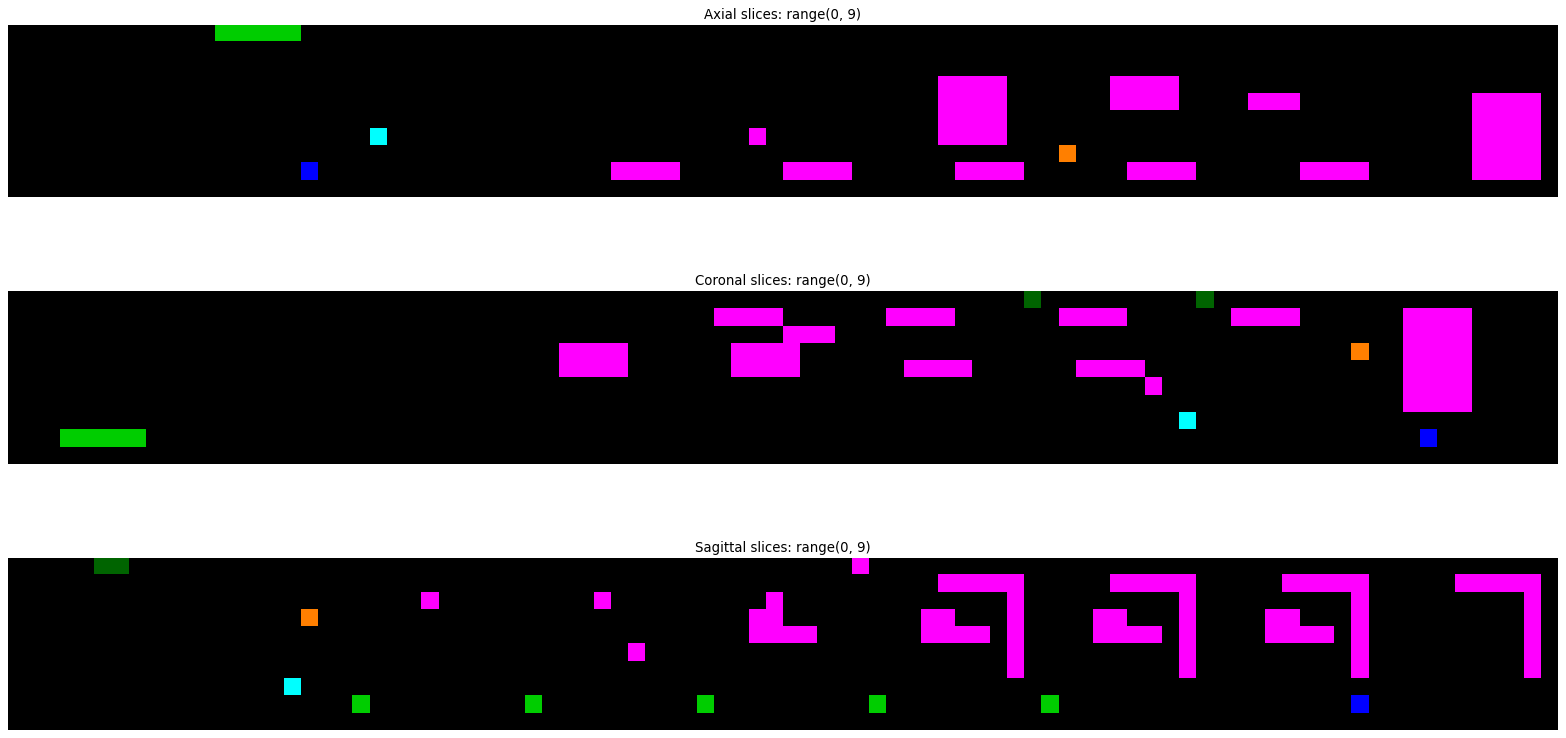

In [3]:
# Use the Connected Components 3D library to produce a multi-label mask

connectivity = 26 # Number of voxels around the current voxel to be considered for connectivity. Options: 26, 18, 6
dummy_mask_cc = cc3d.connected_components(dummy_mask, connectivity=connectivity, max_labels=20)

# Convert the mask into SITK image, map labels into RGB and display 
dummy_mask_cc_sitk = sitk.GetImageFromArray(dummy_mask_cc.astype(np.int16))
dummy_mask_cc_sitk_rgb = sitk.LabelToRGB(dummy_mask_cc_sitk) # Get RGB color mapping
notebook_utils.display_slices(dummy_mask_cc_sitk_rgb,
                             sagittal_slice_idxs=range(0,9),
                             coronal_slice_idxs=range(0,9),
                             axial_slice_idxs=range(0,9))

## Test on predicted GTV masks

### Read and display a predicted mask

(141, 141, 48)


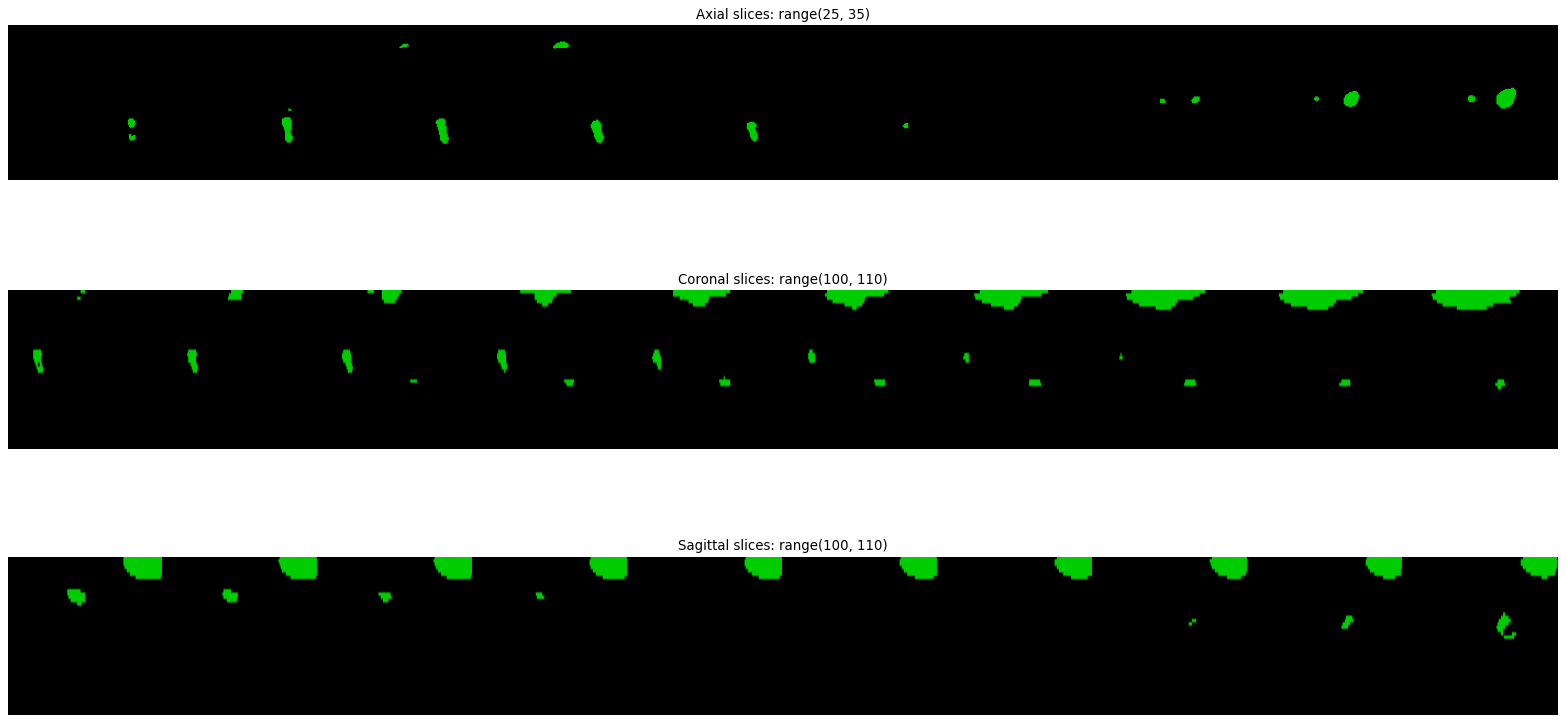

In [4]:
gtv_mask_path = "../data/predictions/CHGJ015/predicted_ct_gtvt.nrrd"

# Read the file
pred_mask_sitk = sitk.ReadImage(gtv_mask_path)
print(pred_mask_sitk.GetSize())

pred_mask_sitk_rgb = sitk.LabelToRGB(pred_mask_sitk) # Get RGB color mapping

notebook_utils.display_slices(pred_mask_sitk_rgb,
                             sagittal_slice_idxs=range(100,110),
                             coronal_slice_idxs=range(100,110),
                             axial_slice_idxs=range(25,35))

pred_mask_np = sitk.GetArrayFromImage(pred_mask_sitk)

### Post process it by extracting connected components 

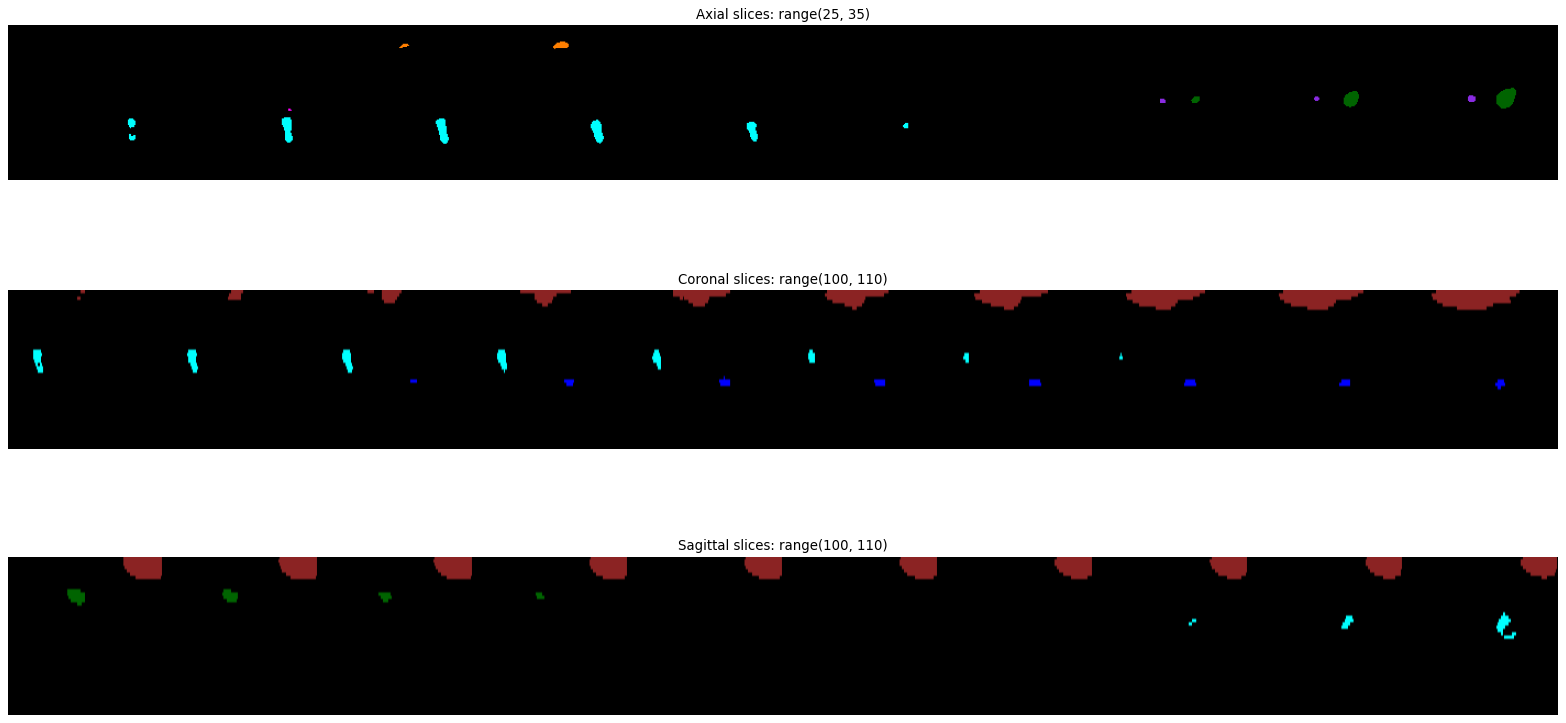

In [5]:
# Use the Connected Components 3D library to produce a multi-label mask

connectivity = 26 # Number of voxels around the current voxel to be considered for connectivity. Options: 26, 18, 6
pred_mask_np_cc = cc3d.connected_components(pred_mask_np, connectivity=connectivity, max_labels=2000)

# Convert the mask into SITK image, map labels into RGB and display 
pred_mask_sitk_cc = sitk.GetImageFromArray(pred_mask_np_cc.astype(np.int16))
pred_mask_sitk_cc.CopyInformation(pred_mask_sitk)

pred_mask_sitk_cc_rgb = sitk.LabelToRGB(pred_mask_sitk_cc) # Get RGB color mapping

notebook_utils.display_slices(pred_mask_sitk_cc_rgb,
                             sagittal_slice_idxs=range(100,110),
                             coronal_slice_idxs=range(100,110),
                             axial_slice_idxs=range(25,35))